In [1]:
%matplotlib inline

# RBF Kernel hyperparameters

The RBF kernel can be learnable and fine-tuned. It includes number of kernels, and the scale of kernel means. Here we use the Nanostring CosMx data as an example to show how to fine-tune the hyperparameters of RBF kernels.

### Import packages & data

In [2]:
import random
import numpy as np
import pandas as pd
import tifffile as tiff
import matplotlib.pyplot as plt 

import Bering as br

In [3]:
# load data
df_spots_all = br.datasets.cosmx_nsclc_he()
df_spots_seg = df_spots_all[df_spots_all['labels'] != 'background'] # foreground nodes
df_spots_unseg = df_spots_all[df_spots_all['labels'] == 'background'] # background nodes

### Dense and large RBF kernels

In [4]:
# image-free segmentation
bg = br.BrGraph(df_spots_seg, df_spots_unseg)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 4, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)

In [5]:
edge_rbf_start = 0
edge_rbf_stop = 128 
edge_rbf_n_kernels = 64 # the mean of RBF kernel is 0~128, with 64 kernels evenly distributed
edge_rbf_learnable = True # set RBF kernel to be learnable during back propagation

Training node classifier:  98%|█████████▊| 49/50 [00:20<00:00,  3.01it/s]

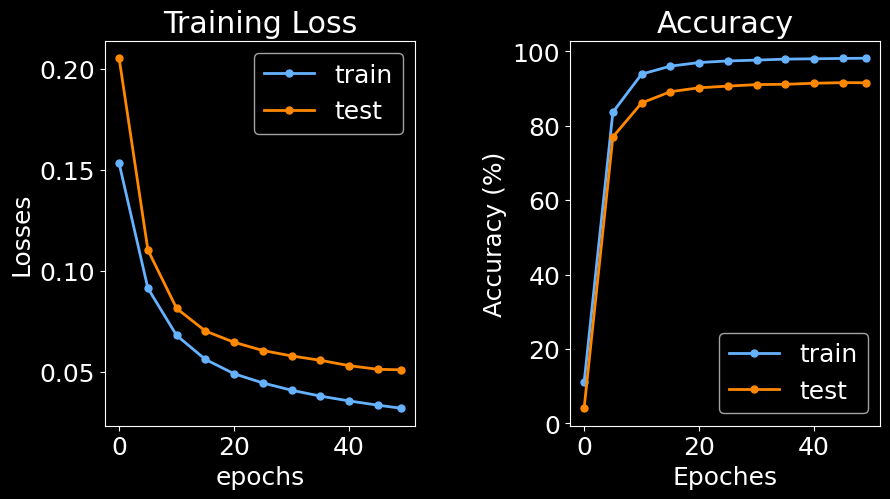

Training edge classifier:  98%|█████████▊| 49/50 [00:23<00:00,  2.08it/s]

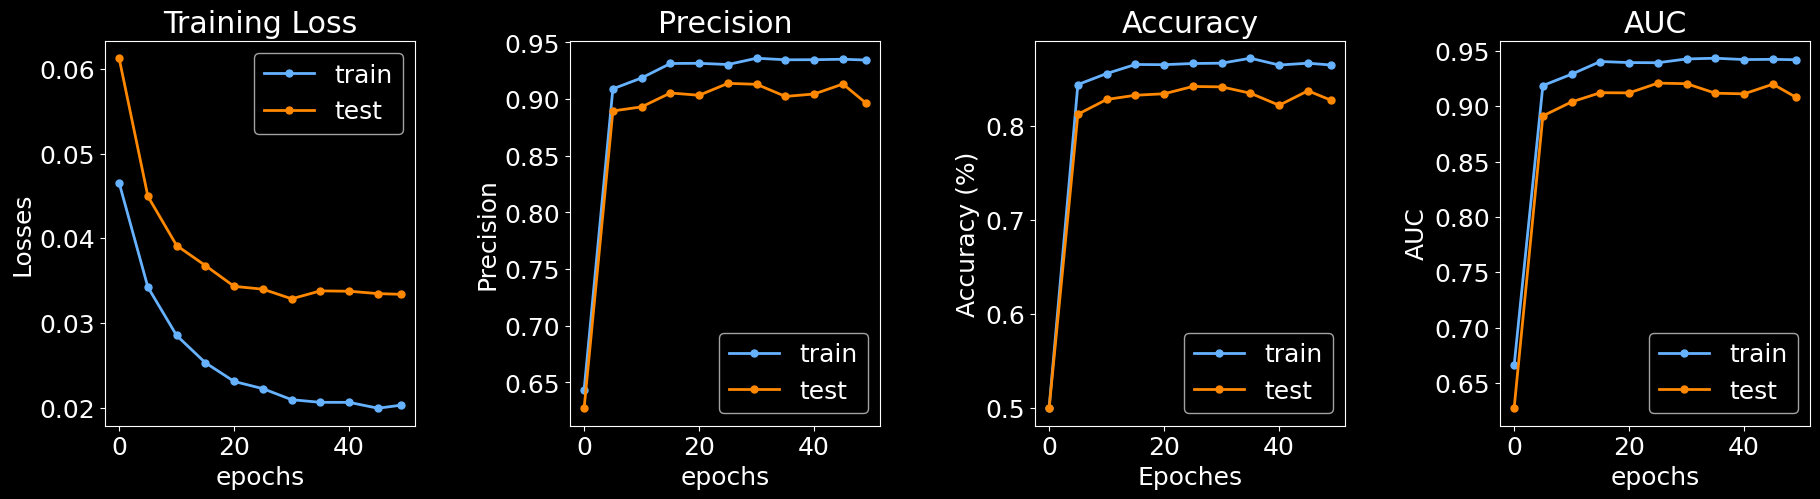

Training edge classifier: 100%|██████████| 50/50 [00:24<00:00,  2.00it/s]


In [6]:
br.train.Training(
    bg,
    edge_rbf_start = edge_rbf_start,
    edge_rbf_stop = edge_rbf_stop,
    edge_rbf_n_kernels = edge_rbf_n_kernels, 
    edge_rbf_learnable = edge_rbf_learnable,
)

In [7]:
# randomly select a cell
random_cells = cells = random.sample(bg.segmented.index.values.tolist(), 1)[:3] # 3 random cells

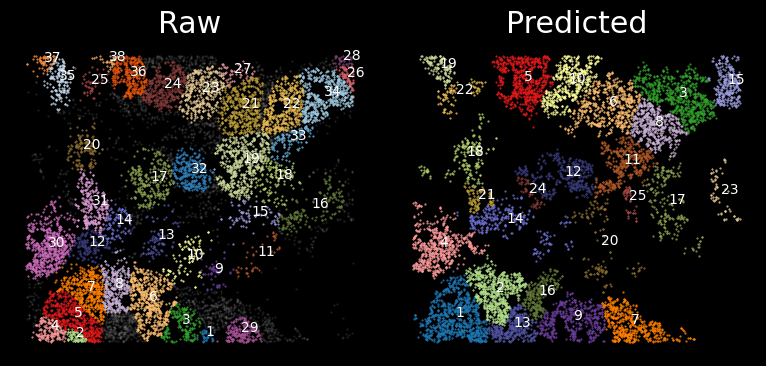

In [8]:
for random_cell in random_cells:
    br.pl.Plot_Segmentation(
        bg, 
        cell_name = random_cell,
        n_neighbors = 10, 
        zoomout_scale = 4,
        use_image = True,
        pos_thresh = 0.6,
        resolution = 0.05,
        num_edges_perSpot = 100,
        min_prob_nodeclf = 0.3,
        n_iters = 20,
    )

### Dense and small RBF kernels

In [9]:
# image-free segmentation
bg = br.BrGraph(df_spots_seg, df_spots_unseg)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 4, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)

In [10]:
edge_rbf_start = 0
edge_rbf_stop = 32 
edge_rbf_n_kernels = 64 # the mean of RBF kernel is 0~128, with 64 kernels evenly distributed
edge_rbf_learnable = True # set RBF kernel to be learnable during back propagation

Training node classifier:  98%|█████████▊| 49/50 [00:18<00:00,  3.14it/s]

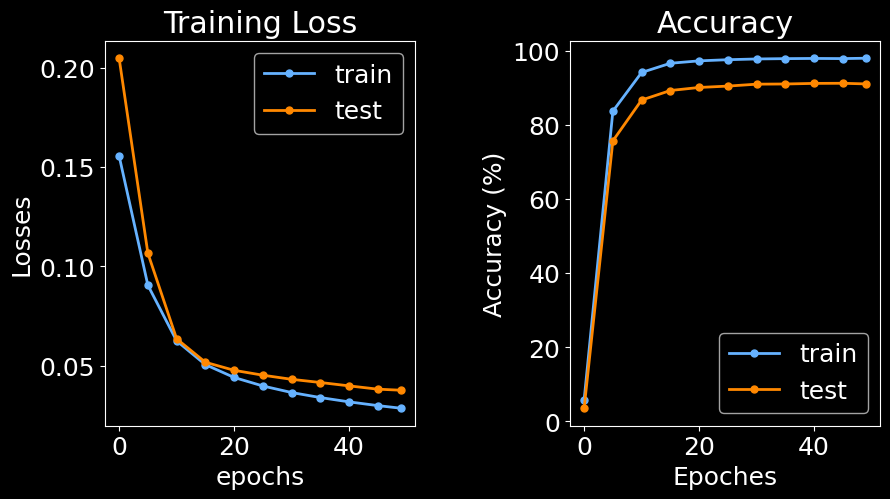

Training edge classifier:  98%|█████████▊| 49/50 [00:22<00:00,  2.29it/s]

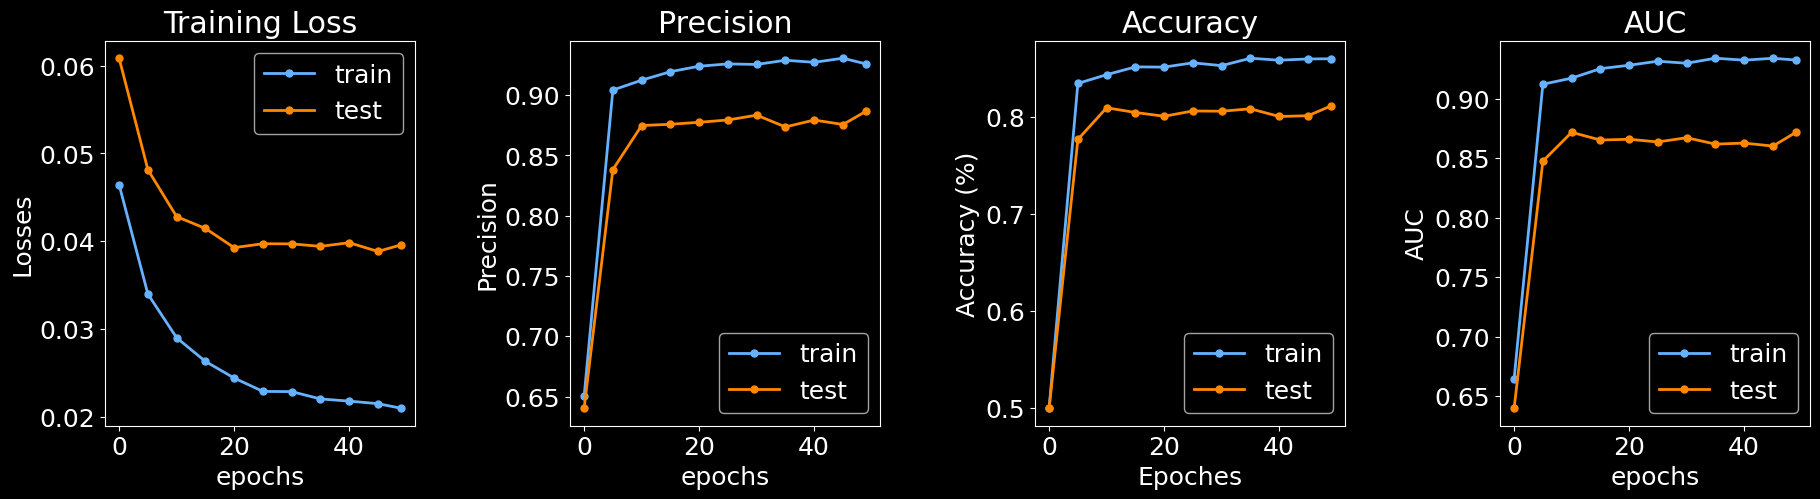

Training edge classifier: 100%|██████████| 50/50 [00:24<00:00,  2.05it/s]


In [11]:
br.train.Training(
    bg,
    edge_rbf_start = edge_rbf_start,
    edge_rbf_stop = edge_rbf_stop,
    edge_rbf_n_kernels = edge_rbf_n_kernels, 
    edge_rbf_learnable = edge_rbf_learnable,
)

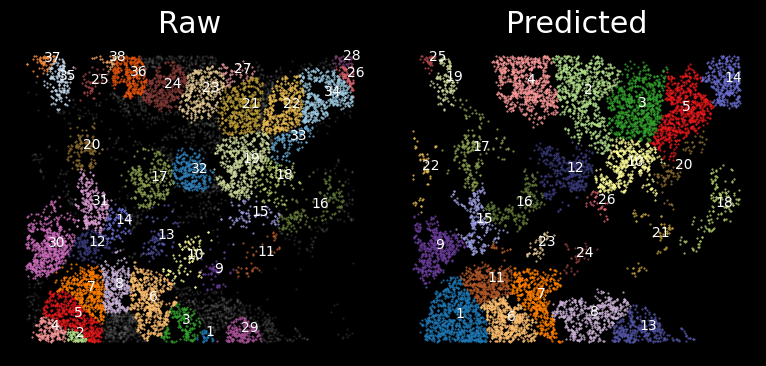

In [12]:
for random_cell in random_cells:
    br.pl.Plot_Segmentation(
        bg, 
        cell_name = random_cell,
        n_neighbors = 10, 
        zoomout_scale = 4,
        use_image = True,
        pos_thresh = 0.6,
        resolution = 0.05,
        num_edges_perSpot = 100,
        min_prob_nodeclf = 0.3,
        n_iters = 20,
    )

### Shallow and small RBF kernels

In [13]:
# image-free segmentation
bg = br.BrGraph(df_spots_seg, df_spots_unseg)
br.graphs.BuildWindowGraphs(bg, n_cells_perClass = 4, window_width = 100.0, window_height = 100.0, n_neighbors = 10)
br.graphs.CreateData(bg, batch_size = 16, training_ratio = 0.8)

In [14]:
edge_rbf_start = 0
edge_rbf_stop = 32 
edge_rbf_n_kernels = 8 # the mean of RBF kernel is 0~128, with 64 kernels evenly distributed
edge_rbf_learnable = True # set RBF kernel to be learnable during back propagation

Training node classifier:  98%|█████████▊| 49/50 [00:20<00:00,  2.92it/s]

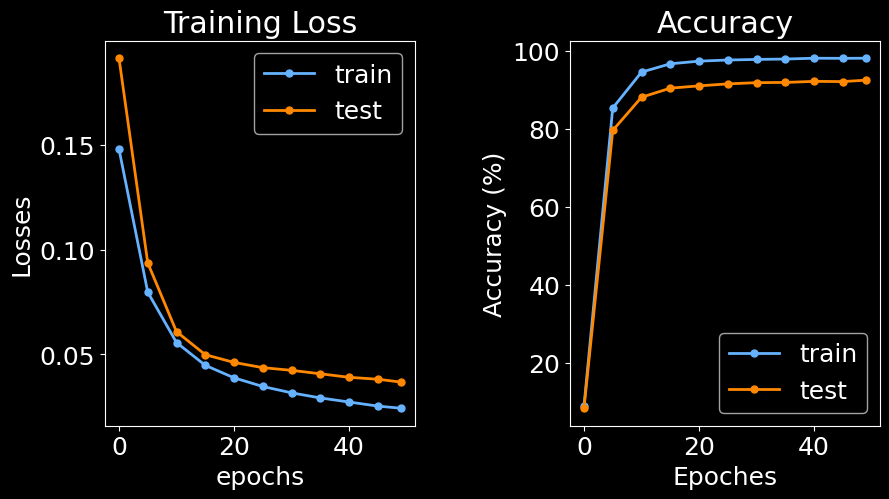

Training edge classifier:  98%|█████████▊| 49/50 [00:23<00:00,  2.29it/s]

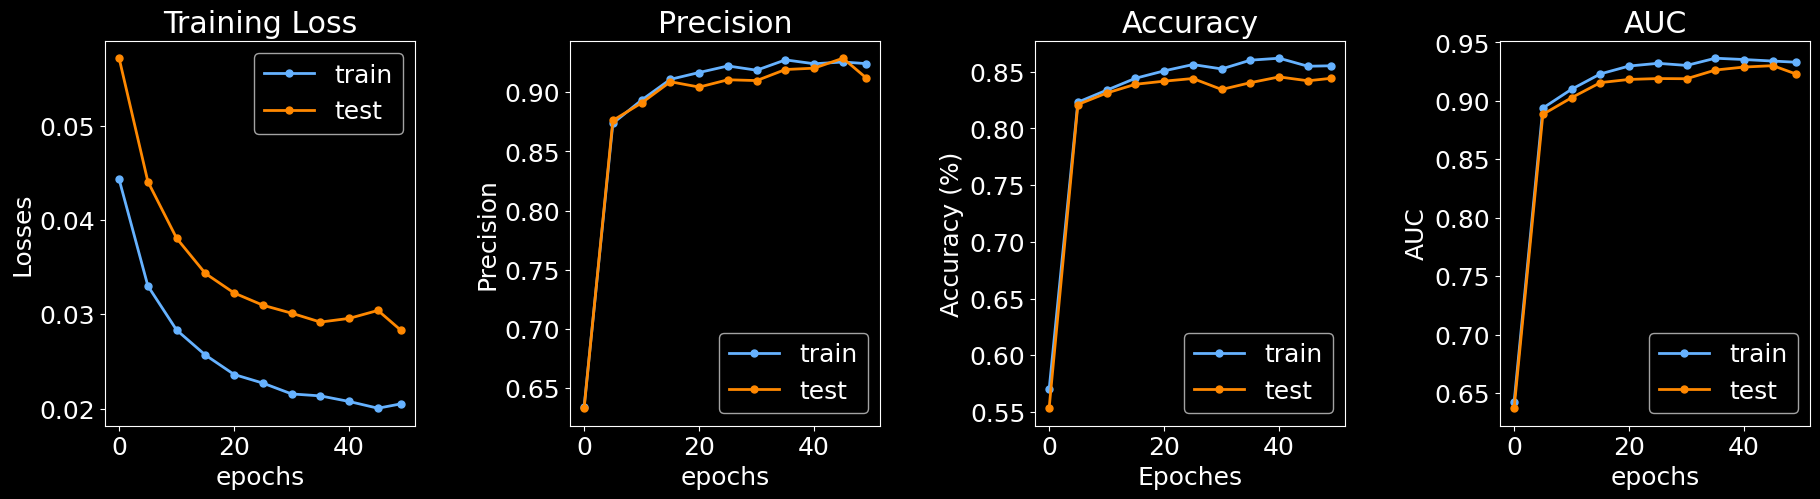

Training edge classifier: 100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


In [15]:
br.train.Training(
    bg,
    edge_rbf_start = edge_rbf_start,
    edge_rbf_stop = edge_rbf_stop,
    edge_rbf_n_kernels = edge_rbf_n_kernels, 
    edge_rbf_learnable = edge_rbf_learnable,
)

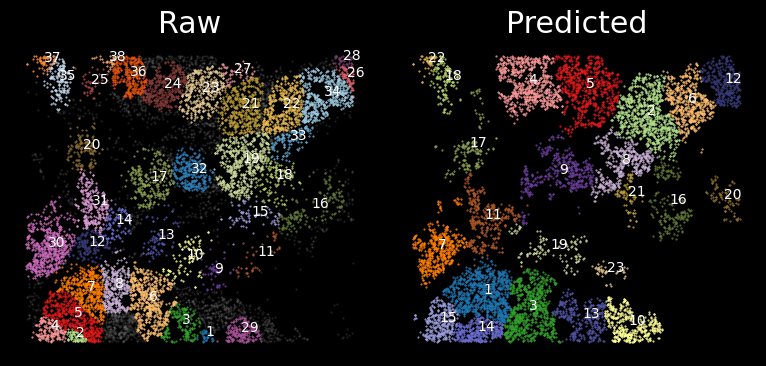

In [16]:
for random_cell in random_cells:
    br.pl.Plot_Segmentation(
        bg, 
        cell_name = random_cell,
        n_neighbors = 10, 
        zoomout_scale = 4,
        use_image = True,
        pos_thresh = 0.6,
        resolution = 0.05,
        num_edges_perSpot = 100,
        min_prob_nodeclf = 0.3,
        n_iters = 20,
    )